<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


C:\Users\Andrea Dayo\AppData\Local\Temp\ipykernel_17508\1138043804.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])
c:\Users\Andrea Dayo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andrea Dayo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

Coefficients: 
 [31407.86138355]
Mean squared error: 2720800316.25
Coefficient of determination: 0.32
Model's Rent Forecast: -12667.23935448964
Actual Rent: 16000


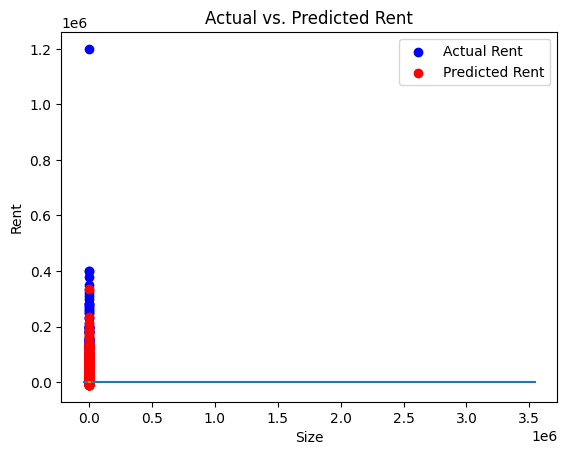

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Loading the Data
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

## Basic Inspection
data.info()
data.isnull().sum()

## Simple Exploratory Data Analysis
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)
sns.distplot(data['Rent'])
sns.distplot(data['Size'])
data['Floor'].value_counts()
data['Size'].value_counts()
data['City'].value_counts()
data['Tenant Preferred'].value_counts()
data['Bathroom'].value_counts()
data['Point of Contact'].value_counts()
data['Furnishing Status'].value_counts()
data['Area Locality'].value_counts()

## Preprocessing
### Conversion of Categorical Variable to One-Hot Encoding
data = data[['Size', 'Rent']]  # Selecting 'Size' as the feature and 'Rent' as the target variable

### Training and Test Split
X = data['Size'].values.reshape(-1, 1)  # Reshape to a 2D array as LinearRegression expects 2D input
y = data['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the Values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling
model = LinearRegression()
model.fit(X_train, y_train)

## Evaluation
### Quantitative Evaluation
y_preds = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

### Qualitative Evaluation
sample_data = X_test[0]  # You can choose any data point from X_test for prediction
sample_data_standardized = sc.transform(sample_data.reshape(1, -1))
model_rent_forecast = model.predict(sample_data_standardized)[0]
print("Model's Rent Forecast:", model_rent_forecast)
actual_rent = y_test.iloc[0]
print("Actual Rent:", actual_rent)

## Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Rent')
plt.scatter(X_test, y_preds, color='red', label='Predicted Rent')
plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("Actual vs. Predicted Rent")
plt.legend()
plt.savefig("linear_regression_plot.png")
plt.show()
